<a href="https://colab.research.google.com/github/yagneshmodi/ML-Assignments/blob/main/Animal_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd

In [44]:
data = pd.read_csv("/content/animals.csv", header='infer')

In [45]:
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [46]:
data.columns = data.columns.str.strip()

In [47]:
pd.crosstab([data['Hair'], data['Feathers'], data['Eggs'], data['Milk'], data['Airborne'], data['Aquatic'], data['Predator'], data['Teeth'], data['Backbone'], data['Breathes'], data['Venemous'], data['Fins'], data['Legs'], data['Tails'], data['Domestic'], data['Catsize']], data['Class'])

Class                                                                                                                1  \
Hair Feathers Eggs Milk Airborne Aquatic Predator Teeth Backbone Breathes Venemous Fins Legs Tails Domestic Catsize      
0    0        0    0    0        0       1        0     0        1        1        0    8    1     0        0        0   
                                 1       1        1     1        0        1        0    0    1     0        0        0   
                   1    0        1       1        1     1        1        0        1    0    1     0        1        2   
              1    0    0        0       0        0     0        1        0        0    0    0     0        0        0   
                                                                                        6    0     0        0        0   
                                         1        0     0        0        0        0    0    0     0        0        0   
                                                  1     1        1        0        0    0    1     0        0        0   
                                                                          1        0    0    1     0        0        0   
                                 1       0        1     1        0        0        1    0    1     0        0        0   
                                                                                                   1        0        0   
                                                                 1        0        0    4    0     0        0        0   
                                         1        0     0        0        0        0    4    0     0        0        0   
                                                                                        5    0     0        0        0   
                                                                                        6    0     0        0        0   
                                                                                        8    0     0        1        0   
                                                                          1        0    0    0     0        0        0   
                                                  1     1        0        0        1    0    1     0        0        0   
                                                                                                            1        0   
                                                                          1        1    0    1     0        1        0   
                                                                 1        0        0    4    0     0        0        0   
                                                                                             1     0        0        0   
                                                                          1        0    4    0     0        0        0   
                        1        0       0        0     0        1        0        0    6    0     0        0        0   
                                         1        0     0        1        0        0    6    0     0        0        0   
     1        1    0    0        0       0        0     1        1        0        0    2    1     0        1        0   
                                         1        0     1        1        0        0    2    1     0        0        0   
                                                                                                            1        0   
                                 1       1        0     1        1        0        0    2    1     0        1        0   
                        1        0       0        0     1        1        0        0    2    1     0        0        0   
                                                                                                            1        0   
                                                                                                

In [48]:
from sklearn import tree

In [49]:
y = data['Class']

In [50]:
y

0     1
1     1
2     4
3     1
4     1
     ..
85    7
86    4
87    2
88    6
89    5
Name: Class, Length: 90, dtype: int64

In [51]:
X = data.drop(['Sr', 'Class'], axis=1)

In [52]:
X

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0


In [53]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [54]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [55]:
clf = clf.fit(X,y)

In [56]:
import pydotplus

In [57]:
from IPython.display import Image

In [58]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=['1', '2', '3', '4', '5', '6', '7'],
                              filled=True, out_file=None)

In [59]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Milk <= 0.5\\nentropy = 2.361\\nsamples = 90\\nvalue = [37, 18, 3, 12, 4, 7, 9]\\nclass = 1", fillcolor="#f8decb"] ;\n1 [label="Teeth <= 0.5\\nentropy = 2.35\\nsamples = 53\\nvalue = [0, 18, 3, 12, 4, 7, 9]\\nclass = 2", fillcolor="#f4fbe2"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Feathers <= 0.5\\nentropy = 1.463\\nsamples = 34\\nvalue = [0, 18, 0, 0, 0, 7, 9]\\nclass = 2", fillcolor="#e5f6b8"] ;\n1 -> 2 ;\n3 [label="entropy = 0.989\\nsamples = 16\\nvalue = [0, 0, 0, 0, 0, 7, 9]\\nclass = 7", fillcolor="#f9d3e4"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 18\\nvalue = [0, 18, 0, 0, 0, 0, 0]\\nclass = 2", fillcolor="#b7e539"] ;\n2 -> 4 ;\n5 [label="Fins <= 0.5\\nentropy = 1.312\\nsamples = 19\\nvalue = [0, 0, 3, 12, 4, 0, 0]\\nclass = 4", fillcolor="#95f1f0"] ;\n1 -> 5 ;\n6 [label="entropy = 0.985\\nsamples = 7\\nva

In [60]:
graph = pydotplus.graph_from_dot_data(dot_data)

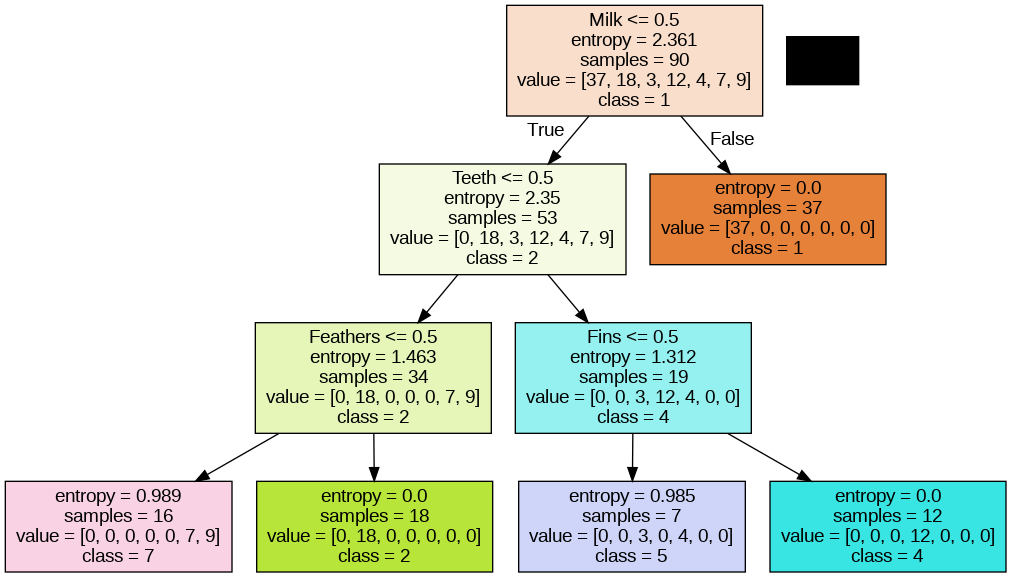

In [61]:
graph
Image(graph.create_png())

In [63]:
testData = [[91,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3],
            [92,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3],
            [93,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4],
            [94,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1],
            [95,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1],
            [96,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2],
            [97,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1],
            [98,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6],
            [99,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1],
            [100,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7],
            [101,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2]]

In [64]:
data.columns

Index(['Sr', 'Hair', 'Feathers', 'Eggs', 'Milk', 'Airborne', 'Aquatic',
       'Predator', 'Teeth', 'Backbone', 'Breathes', 'Venemous', 'Fins', 'Legs',
       'Tails', 'Domestic', 'Catsize', 'Class'],
      dtype='object')

In [65]:
testData = pd.DataFrame(testData, columns=data.columns)

In [66]:
testY = testData['Class']

In [67]:
testY

0     3
1     3
2     4
3     1
4     1
5     2
6     1
7     6
8     1
9     7
10    2
Name: Class, dtype: int64

In [68]:
testX = testData.drop(['Sr', 'Class'], axis=1)

In [69]:
testX

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1
1,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
3,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
5,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1
6,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
7,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
8,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
9,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
predY = clf.predict(testX)

In [71]:
predY

array([7, 5, 4, 1, 1, 2, 1, 7, 1, 7, 2])

In [72]:
testY

0     3
1     3
2     4
3     1
4     1
5     2
6     1
7     6
8     1
9     7
10    2
Name: Class, dtype: int64

In [74]:
predictions = pd.concat([testData['Sr'], testData['Class'], pd.Series(predY, name="Predicted Class")], axis=1)

In [75]:
predictions

,Sr,Class,Predicted Class
0,91,3,7
1,92,3,5
2,93,4,4
3,94,1,1
4,95,1,1
5,96,2,2
6,97,1,1
7,98,6,7
8,99,1,1
9,100,7,7


In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(testY, predY)

0.7272727272727273

In [78]:
print("Accuracy on test data is %.2f" % (accuracy_score(testY, predY)*100))

Accuracy on test data is 72.73
